In [1]:
import seaborn as sns

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv('earthquakes_parsed_place.csv')

### Utilizing seaborn for advanced plotting

#### Categorical data

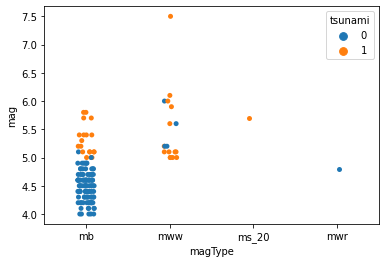

In [2]:
# stripplot() function which plots the points in strips that denote each category

# Passing subset of earthquakes occurring in Indonesia to the data parameter, and specifying that we want to put magType on the x-axis, magnitudes on y-axis, 
# and color the points by whether the earthquakes was accompanied by a tsunami (blue)

sns.stripplot(x='magType', y='mag', hue='tsunami', data=earthquakes.query('parsed_place == "Indonesia"'))
plt.show()

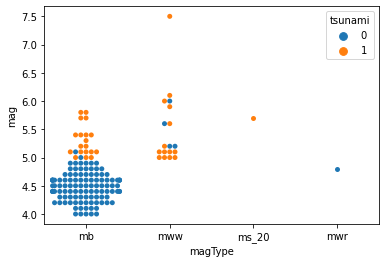

In [3]:
# swarmplot() function will reduce the overlap as much as possible

sns.swarmplot(x='magType', y='mag', hue='tsunami', data=earthquakes.query('parsed_place == "Indonesia"'))
plt.show()

#### Correlations and heatmaps

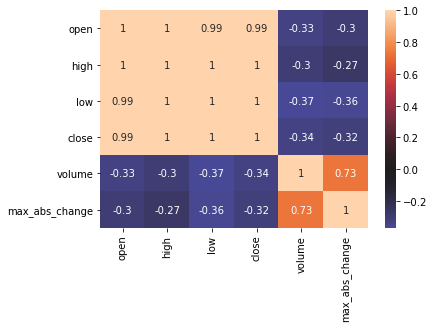

In [4]:
# Making a heatmap of the correlations between the OHLC stock prices, the log of volume traded, and the daily difference between the highest and lowest prices (max_abs_change)

sns.heatmap(fb.sort_index().assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr(), annot=True, center=0)

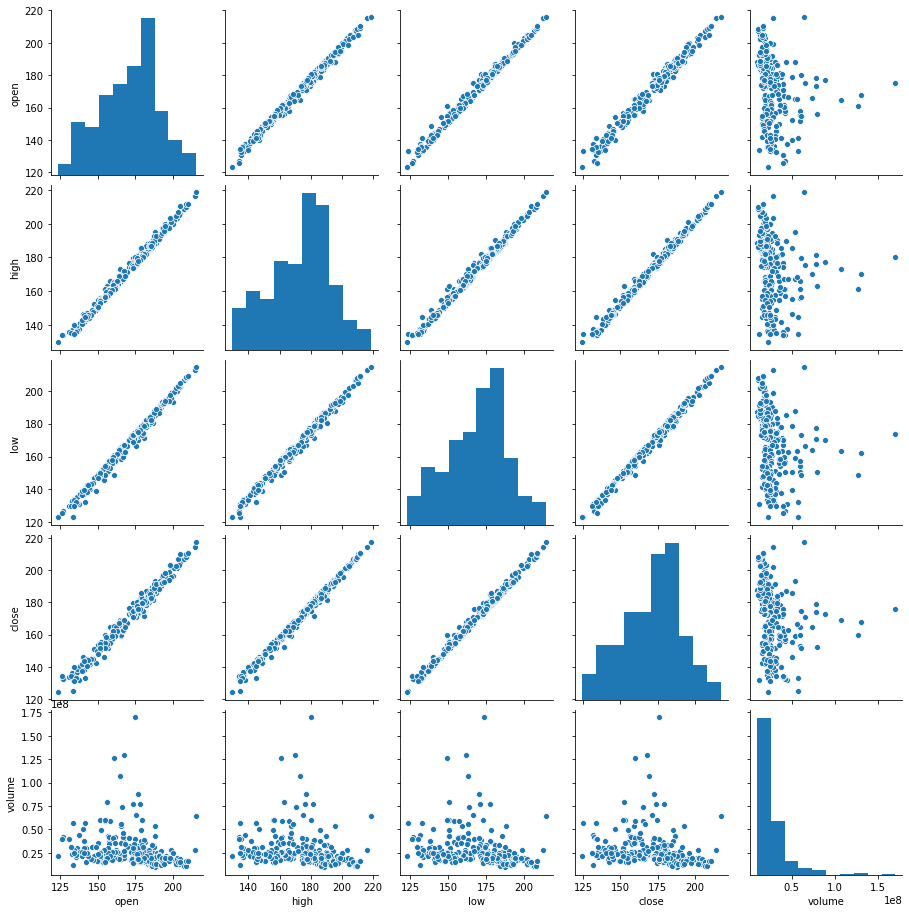

In [5]:
# Using pairplot() to see the correlations between the columns

sns.pairplot(fb)

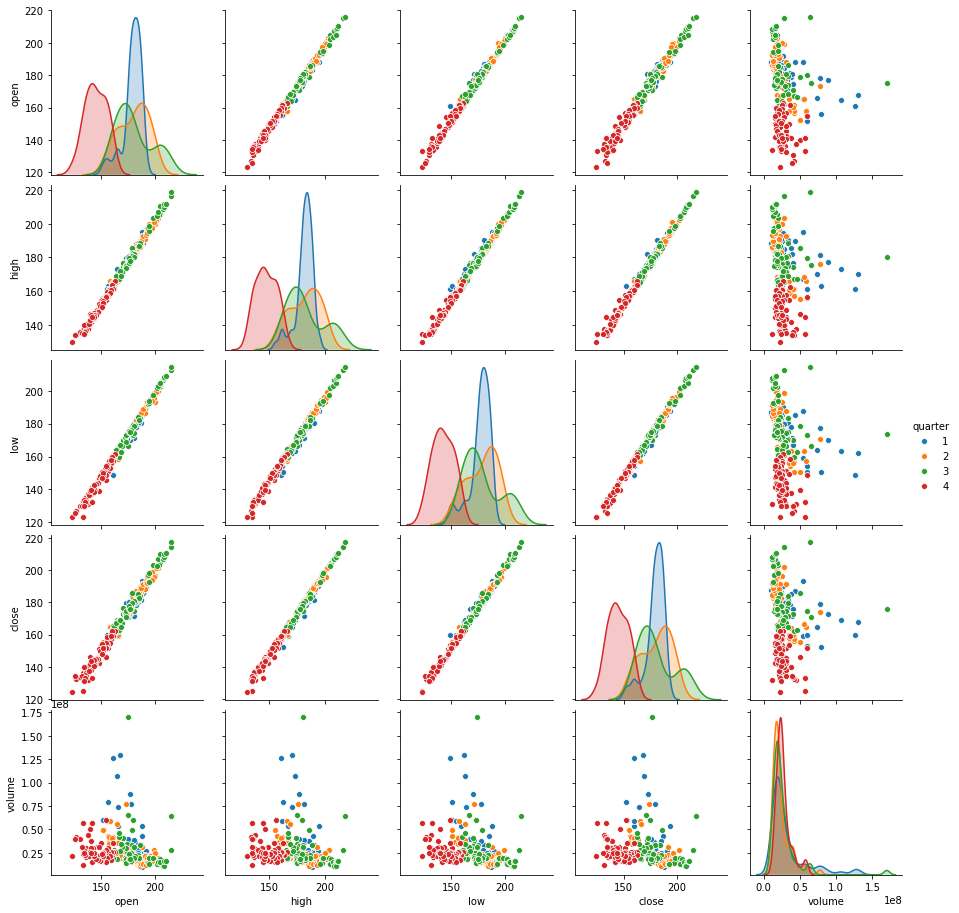

In [6]:
# How distribution of the data changed each quarter of the year, also coloring based on other data 

sns.pairplot(fb.assign(quarter=lambda x: x.index.quarter), diag_kind='kde', hue='quarter')

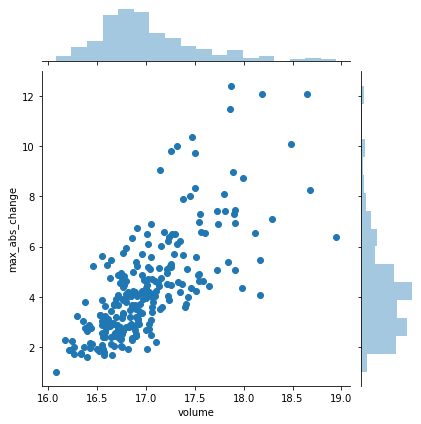

In [7]:
# Comparing two variables by using jointplot() 

sns.jointplot(x='volume', y='max_abs_change', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

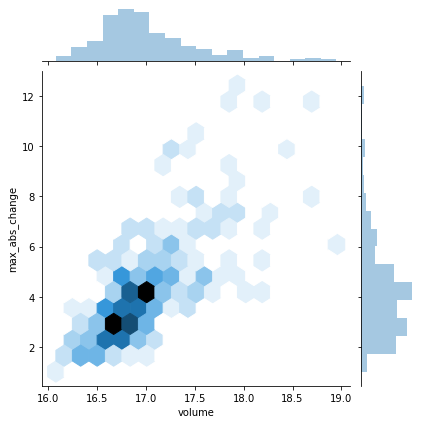

In [8]:
# Using hexbins in jointplot()

sns.jointplot(x='volume', y='max_abs_change', kind='hex', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high -fb.low))

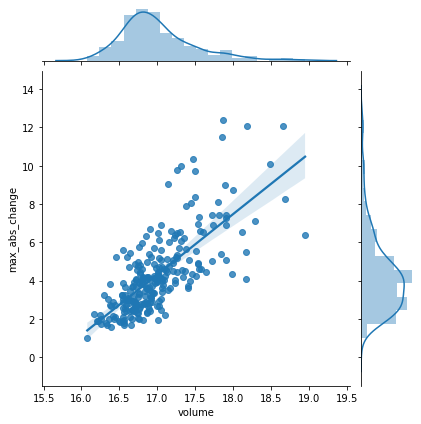

In [9]:
# Plotting a regression in the center and get kernel density estimates 

sns.jointplot(x='volume', y='max_abs_change', kind='reg', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

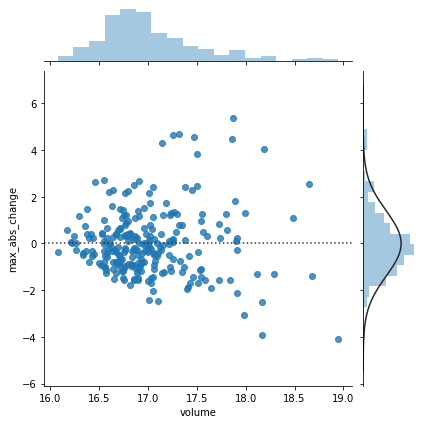

In [10]:
# Checking residuals
# Residuals are the observed values minus the values predicted using the regression line

sns.jointplot(x='volume', y='max_abs_change', kind='resid', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

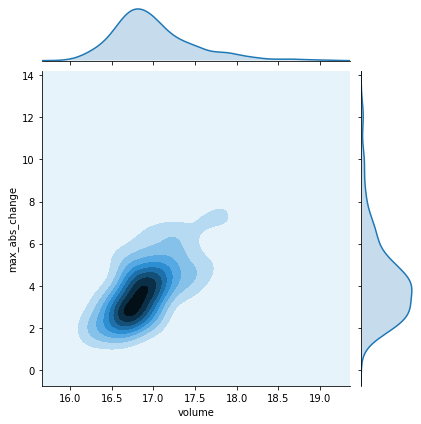

In [11]:
# Using kde to get a plot representing the joint density estimate

sns.jointplot(x='volume', y='max_abs_change', kind='kde', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low))

#### Regression plots

In [12]:
# regplot() calculates a regression line and plots it, while residplot() calculates the regression and plot only the residuals

# We can write a function to combine these two

# This function will plot all permutations of any two columns allowing to see each column as the regressor and as the dependent variable

In [13]:
# Using assign() to create new columns and saving them in a new dataframe
fb_reg_data = fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).iloc[:, -2:]

In [14]:
# Importing itertools to create efficient iterators for permutations, combinations and infinite cycles or repeats
import itertools

iterator = itertools.repeat('I am an iterator', 1)

for i in iterator:
  print(f'--->{i}')
print('This printed once because the iterator has been exhausted')

for i in iterator:
  print(f'--->{i}')


--->I am an iterator
This printed once because the iterator has been exhausted


In [15]:
iterable = list(itertools.repeat('I am an iterable', 1))

for i in iterable:
  print(f'--->{i}')
print('This prints again because it is an iterable')

for i in iterable:
  print(f'--->{i}')



--->I am an iterable
This prints again because it is an iterable
--->I am an iterable


In [16]:
# Writing function for regression and residuals permutation plots

def reg_resid_plots(data):
  """Using seaborn, plot the regression and residuals plots
  side-by-side for every permutation of 2 columns in the data
  
  Parameters: 
    - data: A pandas dataframe
  
  Returns:
    - A matplotlib Figure object
  """

  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)

  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

  for (x, y), axes, color in zip(
    itertools.permutations(data.columns, 2),
    ax,
    itertools.cycle(['royalblue', 'darkorange'])
  ):
    for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
      func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig

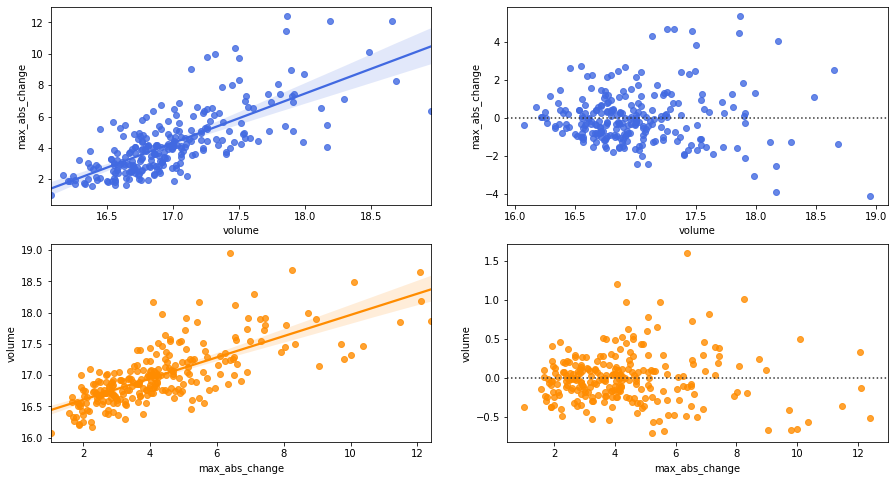

In [17]:
reg_resid_plots(fb_reg_data)

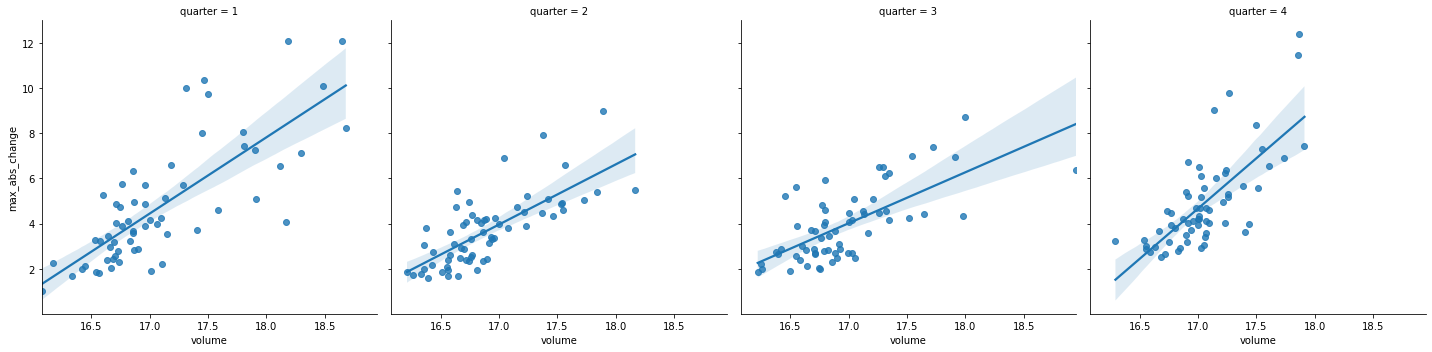

In [18]:
# Plotting regressions across different subsets of our data with lmplot()
# We split regression plots with hue, col, and row, which will color by values in a given column, make a new column for each value, and make a new row for each value, respectively.


# Calculating a regression per quarter with the Facebook stock data, using the volume traded and the daily difference between the highest and lowest price, 
# to see whether this relationship also changes
sns.lmplot(x='volume', y='max_abs_change', data=fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high - fb.low, quarter=lambda x: x.index.quarter), col='quarter')

#### Distributions

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

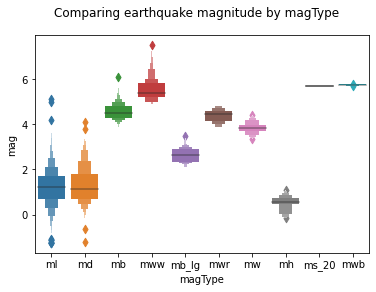

In [19]:
# Using boxenplot() to compare earthquake magnitudes across different values for magType

sns.boxenplot(x='magType', y='mag', data=earthquakes[['magType', 'mag']])
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

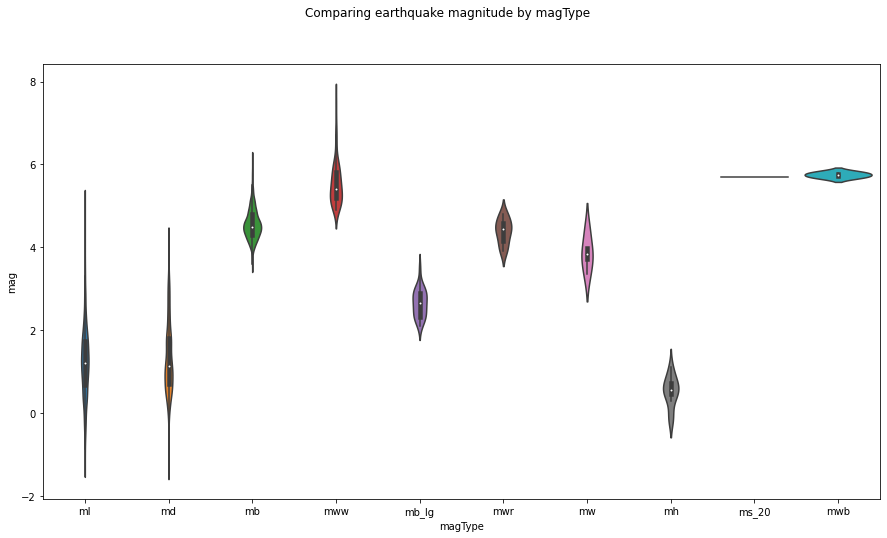

In [20]:
# Using violinplot() which combine kernel density estimates and box plots to visualize quantiles and see the distribution

fig, axes = plt.subplots(figsize=(15, 8))

sns.violinplot(x='magType', y='mag', data=earthquakes[['magType', 'mag']])
plt.suptitle('Comparing earthquake magnitude by magType')

#### Faceting

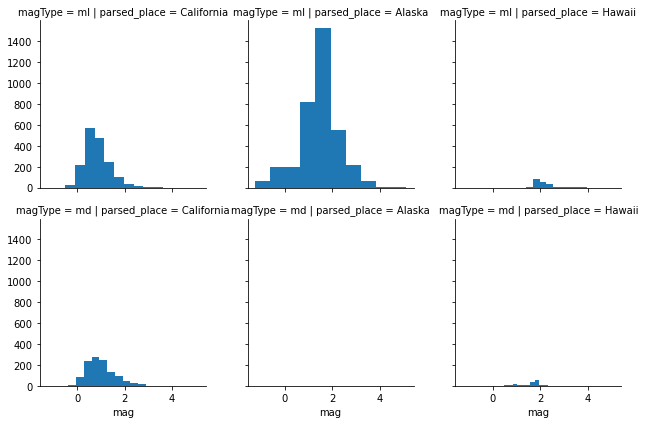

In [21]:
# Faceting allows to plot subsets (facets) of data across subplots

# Creating a facet grid that will allow to compare the distributions of earthquake magnitudes across the magTypes of ml and md in California, Alaska and Hawaii

# First create the FacetGrid object with the data we will be using and define how it will be subset with the row and col arguments

g = sns.FacetGrid(earthquakes[(earthquakes.parsed_place.isin(['California', 'Alaska', 'Hawaii']))\
  & (earthquakes.magType.isin(['ml', 'md']))
  ],
  row='magType', col='parsed_place')

# Using FacetGrid.map() method to run a plotting function on each of the subsets passing along any necessary arguments

g = g.map(plt.hist, 'mag')

### Formatting

#### Titles and labels

Text(0, 0.5, 'price ($)')

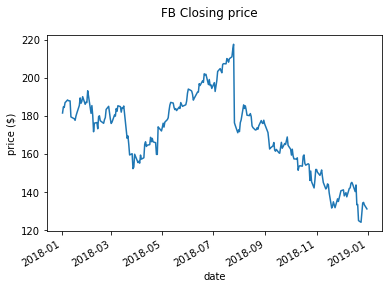

In [22]:
# Plotting Facebook closing price and label everything using matplotlib

fb.close.plot()
plt.suptitle('FB Closing price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price($)')

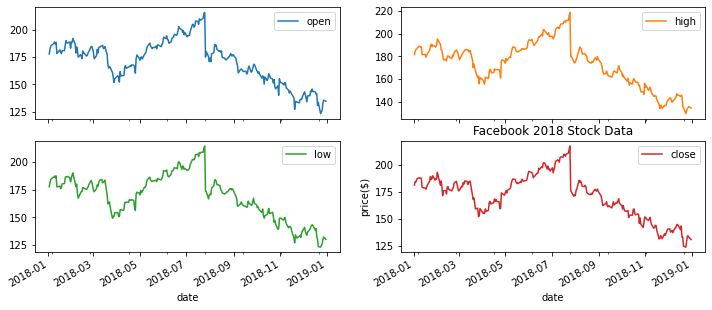

In [23]:
# Making subplots of Facebook OHLC data and using plt.title() 
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

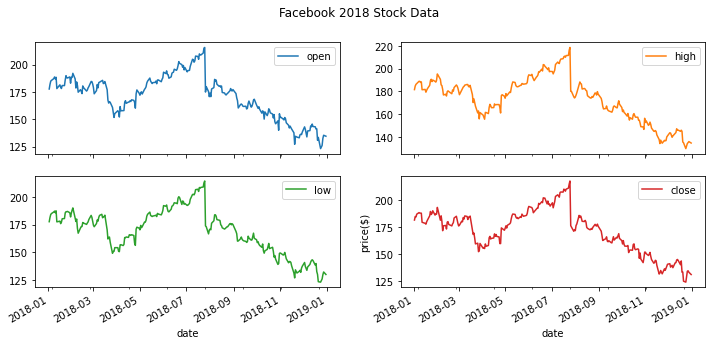

In [24]:
# Same thing but using plt.suptitle() which puts the title for the plot as a whole
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price($)')

#### Legends

Text(0, 0.5, 'price($)')

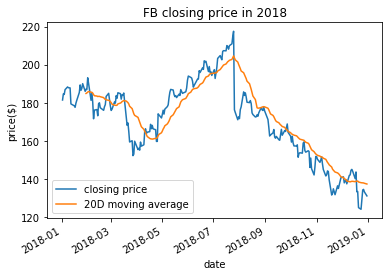

In [25]:
# Plotting Facebook stock's closing price and the 20-day moving average, using the label argument to provide a descriptive name for the legend

fb.assign(ma=lambda x: x.close.rolling(20).mean()).plot(y=['close', 'ma'], title='FB closing price in 2018', label=['closing price', '20D moving average'])
plt.legend(loc='lower left')
plt.ylabel('price($)')

#### Formatting axes

Text(0, 0.5, 'price($)')

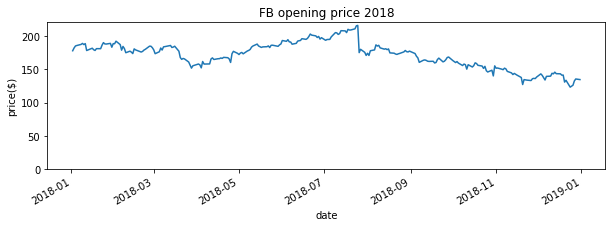

In [26]:
# Plotting Facebook stock's opening price and starting y-axis at zero with ylim()

fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

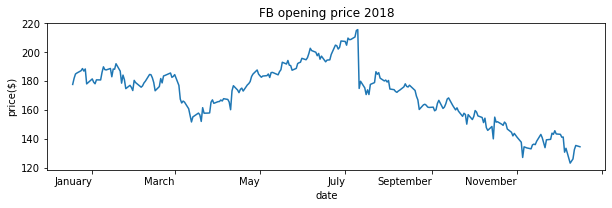

In [27]:
# Controlling tick marks with xticks() and yticks()

# Moving the tick mark of the Facebook open price plot to the 15th of each month and then label each month with its name
# Additionally, show every other month
import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15, calendar.month_name[1::2])
plt.ylabel('price($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

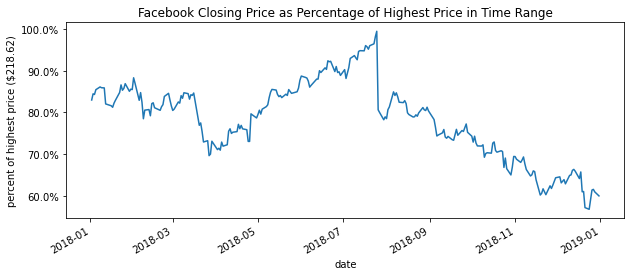

In [28]:
# Formatting percentages or making sure only integers are shown with the ticker module
import matplotlib.ticker as ticker

# Plotting Facebook closing price each day as a percentage of the highest price it had throughout the data
# The shape of the curve will be the same, but the values on the y-axis will need to be represented as percentages

ax = fb.close.plot(figsize=(10, 4), title='Facebook Closing Price as Percentage of Highest Price in Time Range')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=fb.high.max()))
ax.set_yticks([fb.high.max() * pct for pct in np.linspace(0.6, 1, num=5)]) # show only round percentages
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

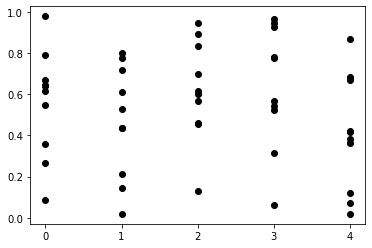

In [29]:
# Using MultipleLocator to hide the ticks at non-integer locations
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(ticker.MultipleLocator(base=1))

### Customizing visualizations

#### Adding reference lines

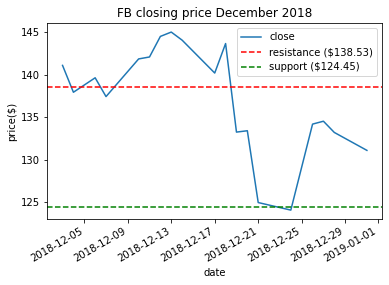

In [30]:
# Adding support and resistance reference lines to line plot of the closing price


support = 124.45
resistance = 138.53

fb.close['2018-12'].plot(title='FB closing price December 2018')
plt.axhline(y=resistance, color='r', linestyle='--', label=f'resistance (${resistance:,.2f})')
plt.axhline(y=support, color='g', linestyle='--', label=f'support (${support:,.2f})')
plt.ylabel('price($)')
plt.legend()


In [31]:
# Using axvline() to draw vertical reference lines for the number of standard deviations from the mean on the distribution of earthquake magnitudes in Indonesia with magType of mb

def std_from_mean_kde(data):
  """
  Plot the KDE of the pandas series along with vertical reference lines for each standard deviation from the mean
  
  Parameters: 
    - data: pandas Series with numeric data
  
  Returns: Matplotlib Axes object
  """

  mean_mag, std_mean = data.mean(), data.std()

  ax = data.plot(kind='kde')
  ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')

  colors = ['green', 'orange', 'red']
  multipliers = [1, 2, 3]
  signs = ['-', '+']

  for sign, (color, multiplier) in itertools.product(
    signs, zip(colors, multipliers)
  ):
    adjustment = multiplier * std_mean
    if sign == '-':
      value = mean_mag - adjustment
      label = '{} {}{}{}'.format(r'$\mu$', r'$\pm$', multiplier, r'$\sigma$')
    else:
      value = mean_mag + adjustment
      label = None
    
    ax.axvline(value, color=color, label=label, alpha=0.5)
  
  ax.legend()
  return ax

Text(0.5, 0, 'mb earthquake magnitude')

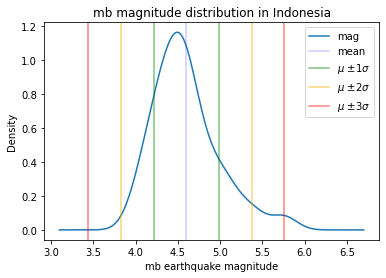

In [32]:
# Using std_from_mean_kde() function to see which parts of the estimated distribution of earthquake magnitudes in Indonesia are within one, two, or three standard deviations from the mean

ax = std_from_mean_kde(earthquakes.query('magType == "mb" and parsed_place == "Indonesia"').mag)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

Text(0, 0.5, 'y')

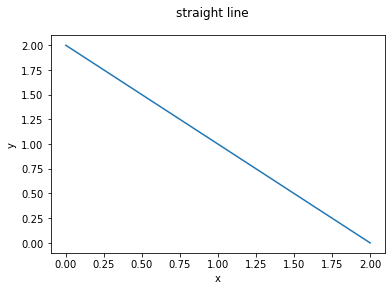

In [33]:
# Making a line with an arbitrary slope as a reference

plt.plot([0, 2], [2, 0])
plt.suptitle('straight line')
plt.xlabel('x')
plt.ylabel('y')

#### Shading regions

Text(0, 0.5, 'Price($)')

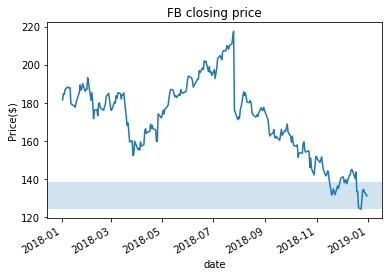

In [34]:
ax = fb.close.plot(title='FB closing price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price($)')

Text(0.5, 0.98, 'FB differential between high and low price Q4 2018')

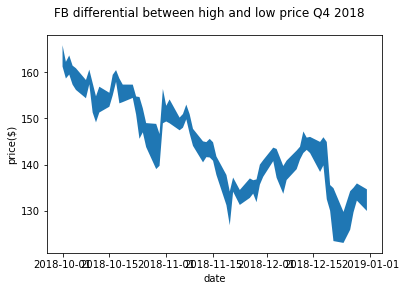

In [35]:
# Shading the area between two curves with fill_between() and fill_betweenx()
fb_q4 = fb['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
ticks = ['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01']
plt.xlabel('date')
plt.ylabel('price($)')
plt.suptitle('FB differential between high and low price Q4 2018')

Text(0.5, 0.98, 'FB differential between high and low price Q4 2018')

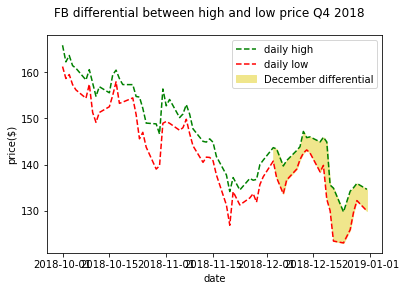

In [37]:
# Providing a boolean mask to the "where" argument, we can specify when to fill the area between the curves.
# Filling only December from the previous example. Also adding dashed lines for the high price curve and the low price curve throughout the time period

fb_q4 = fb['2018-Q4']
plt.fill_between(
  fb_q4.index,
  fb_q4.high,
  fb_q4.low,
  where=fb_q4.index.month == 12,
  color='khaki',
  label='December differential'
)

plt.plot(fb_q4.index, fb_q4.high, 'g--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, 'r--', label='daily low')
ticks = ['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01']
#plt.xticks(ticks, ticks)
plt.xlabel('date')
plt.ylabel('price($)')
plt.legend()
plt.suptitle('FB differential between high and low price Q4 2018')

#### Annotations

Text(0, 0.5, 'price($)')

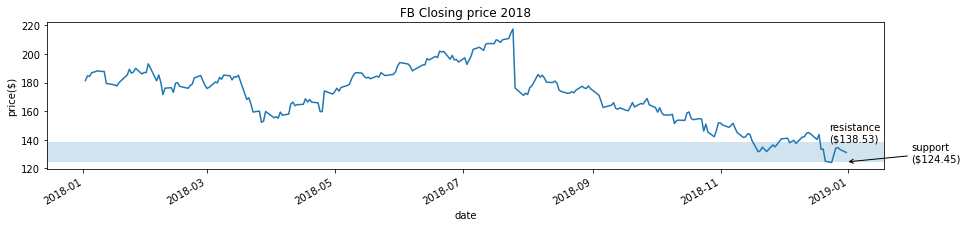

In [42]:
ax = fb.close.plot(title='FB Closing price 2018', figsize=(15, 3))
ax.axhspan(support, resistance, alpha=0.2)
plt.annotate(f'support\n(${support:,.2f})', xy=('2018-12-31', support), xytext=('2019-01-31', support), arrowprops={'arrowstyle':'->'})
plt.annotate(f'resistance\n(${resistance:,.2f})', xy=('2018-12-23', resistance))
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

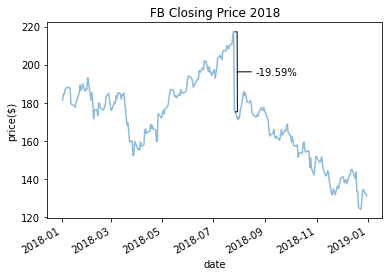

In [43]:
# Annotating the big decline in the price of Facebook in July
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(f'{pct_drop:.2%}', \
  xy=('2018-07-27', (open_price + close_price) / 2), \
    xytext=('2018-08-20', (open_price + close_price) / 2 - 1.5), \
      arrowprops=dict(arrowstyle='-[,widthB=4.0, lengthB=0.2'))
plt.ylabel('price($)')

#### Colors

Reference for colors: https://matplotlib.org/examples/color/named_colors.html

Colormaps: https://matplotlib.org/gallery/color/colormap_reference.html

Text(0, 0.5, 'price($)')

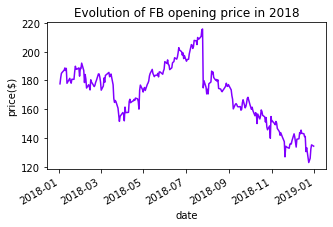

In [44]:
fb.plot(kind='line', y='open', figsize=(5, 3), color='#8000FF', legend=False, title='Evolution of FB opening price in 2018')
plt.ylabel('price($)')

Text(0, 0.5, 'price($)')

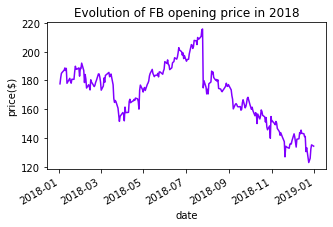

In [45]:
# Using RGBA values
fb.plot(kind='line', y='open', figsize=(5, 3), color=(128/255, 0, 1), legend=False, title='Evolution of FB opening price in 2018')
plt.ylabel('price($)')

In [46]:
# Obtaining a list of all the available colormaps
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0, 0.5, 'price($)')

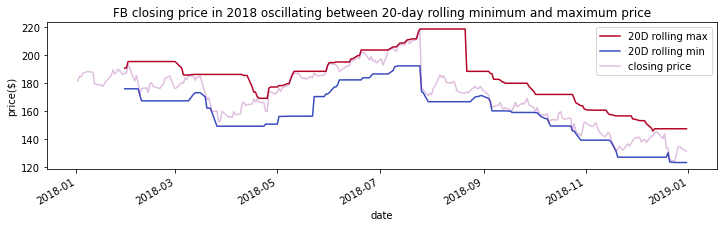

In [47]:
# Using coolwarm_r colormap to show how Facebook stock's closing price oscillates between the 20-day rolling minimum and maximum prices
ax = fb.assign(
  rolling_min=lambda x: x.low.rolling(20).min(),
  rolling_max=lambda x: x.high.rolling(20).max(),
).plot(
  y=['rolling_max', 'rolling_min'],
  colormap=cm.coolwarm_r,
  label=['20D rolling max', '20D rolling min'],
  figsize=(12, 3),
  title='FB closing price in 2018 oscillating between 20-day rolling minimum and maximum price'
)
ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price($)')

In [48]:
# Ask for the midpoint of the ocean colormap to use for the color argument
cm.get_cmap('ocean')(.5)

(0.0, 0.2529411764705882, 0.5019607843137255, 1.0)

Text(0, 0.5, 'price($)')

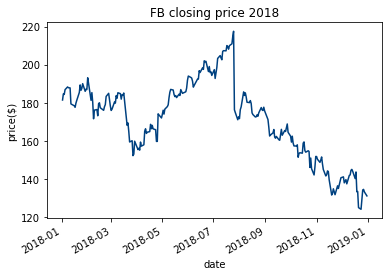

In [49]:
fb.close.plot(color=cm.get_cmap('ocean')(.5), title='FB closing price 2018')
plt.ylabel('price($)')

In [50]:
# Making a custom colormap
# Two-color sequential colormap that goes from pastel blue to pastel purple

# Translate hex colors to their RGB equivalents
import re

def hex_to_rgb_color_list(colors):
  """
  Take color or list of hex code colors and convert them to RGB colors in the range [0, 1]
  
  Parameters:
    - colors: color or list of color strings as hex codes
  Returns: The color or list of colors in RGB representation
  """

  if isinstance(colors, str):
    colors = [colors]
  
  for i, color in enumerate(
    [color.replace('#', '') for color in colors]
  ):
    hex_length = len(color)

    if hex_length not in [3, 6]:
      raise ValueError('Your colors must be of the form #FFFFFF or #FFF')
    
    regex = '.' * (hex_length // 3)
    colors[i] = [
      int(val * (6 // hex_length), 16) / 255 \
        for val in re.findall(regex, color)
    ]
  
  return colors[0] if len(colors) == 1 else colors


In [51]:
# Taking those RGB colors and creating the values for the colormap

from matplotlib.colors import ListedColormap
import numpy as np

def two_color_sequential_cmap(rgb_color_list):
  """
  Created a sequential colormap blending from one color to the other
  
  Parameters:
    - rgb_color_list: A list of colors represented as [R,G,B] values in the range [0, 1]
  Returns: A matplotlib ListedColormap object with your colormap
  """

  if not isinstance(rgb_color_list, list):
    raise ValueError('Colors must be passed as a list!')
  elif len(rgb_color_list) != 2:
    raise ValueError('Can only specify two colors; one for each end of the spectrum.')
  elif (
    not isinstance(rgb_color_list[0], list) or not isinstance(rgb_color_list[1], list)
  ) or (len(rgb_color_list[0]) != 3 or len(rgb_color_list[1]) != 3):
    raise ValueError('Each color should be represented as a list of size 3')
  
  N = 256
  entries = 4 # red, green, blue, alpha
  rgbas = np.ones((N, entries)) # creates numpy 4D array with 256 slots for color definitions
  for i in range(entries - 1): # we don't alter alphas
    rgbas[:, i] = np.linspace( # using linspace to create 256 evenly-spaced values
      start=rgb_color_list[0][i],
      stop=rgb_color_list[1][i],
      num=N
    )
  return ListedColormap(rgbas)

In [52]:
# Using draw_cmap() function to draw a colorbar, visualizing our colormap

def draw_cmap(cmap):
  """
  Draw a colorbar for visualizing a colormap.
  
  Parameters:
    - cmap: A matplotlib colormap
    
  Returns: A matplotlib color bar
  """

  img = plt.imshow(np.array([[0, 1]]), cmap=cmap)
  cbar = plt.colorbar(orientation='horizontal', cmap=cmap)
  img.axes.remove()
  return cbar

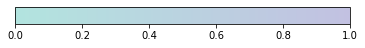

In [53]:
# Usage

my_edge_colors = ['#B2E4DF', '#C2C1E1']
rgbs = hex_to_rgb_color_list(my_edge_colors)
my_cmap = two_color_sequential_cmap(rgbs)
draw_cmap(my_cmap)

In [54]:
# If we want three colors, we will have to adjust our calls to np.linspace() 

def blended_cmap(rgb_color_list):
  """
  Create a colormap blending from one color to the other
  
  Parameters:
    - rgb_color_list: A list of colors represented as [R,G,B] values in the range [0, 1]
  Returns: A matplotlib ListedColormap object with your colormap
  """

  if not isinstance(rgb_color_list, list):
    raise ValueError('Colors must be passed as a list!')
  elif len(rgb_color_list) < 2:
    raise ValueError('Must specify at least 2 colors.')
  elif (not isinstance(rgb_color_list[0], list) or not isinstance(rgb_color_list[1], list)) or (len(rgb_color_list[0]) != 3 or len(rgb_color_list[1]) != 3):
    raise ValueError('Each color should be represented as a list of size 3')
  
  N, entries = 256, 4 # red, green, blue, alpha
  rgbas = np.ones((N, entries))

  segment_count = len(rgb_color_list) - 1
  segment_size = N // segment_count
  remainder = N % segment_count # need to add this back later

  for i in range(entries - 1):
    updates = []
    for seg in range(1, segment_count + 1):
      # handle uneven splits due to remainder
      offset = 0 if not remainder or seg > 1 else remainder
      updates.append(np.linspace(start=rgb_color_list[seg-1][i], stop=rgb_color_list[seg][i], num=segment_size + offset))
    rgbas[:, i] = np.concatenate(updates)
  
  return ListedColormap(rgbas)


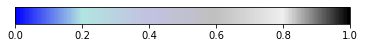

In [55]:
# Usage

my_colors = ['#00F', '#B2E4DF', '#C2C1E1', 'C0C0C0', 'EEE', '000000']
rgbs = hex_to_rgb_color_list(my_colors)
my_cmap = blended_cmap(rgbs)
draw_cmap(my_cmap)

In [56]:
# If we want to use a color when certain conditions are met, we write a generator

# We want to assign colors to years from 1992 to 20018 based on whether they were leap years, distinguishing why they weren't leap years

def color_generator():
  for year in range(1992, 200019):
    if year % 100 == 0 and year % 400 != 0:
      color = '#f0f0f0'
    elif year % 4 == 0:
      color = '#000000'
    else:
      color = '#ffffff'
    yield color

In [57]:
year_colors = color_generator()
year_colors

<generator object color_generator at 0x00000256C071D200>

In [60]:
next(year_colors)

'#ffffff'

## Further reading

- Choosing Colormaps: https://matplotlib.org/users/colormaps.html
- Controlling figure aesthetics (seaborn): https://seaborn.pydata.org/tutorial/aesthetics.html
- Customizing Matplotlib with style sheets and rcParams: https://matplotlib.org/tutorials/introductory/customizing.html
- Format String Syntax: https://docs.python.org/3/library/string.html#format-string-syntax
- Generator Expressions (PEP 289): https://www.python.org/dev/peps/pep-0289/
- Matplotlib Named Colors: https://matplotlib.org/examples/color/named_colors.html
- Multiple assignment and tuple unpacking improve Python code readability: https://treyhunner.com/2018/03/tuple-unpacking-improves-python-code-readability/
- Python: range is not an iterator!: https://treyhunner.com/2018/02/python-range-is-not-an-iterator/
- Python zip() function: https://www.journaldev.com/15891/python-zip-function
- Seaborn API reference: https://seaborn.pydata.org/api.html
- Show Me the Numbers: Designing Tables and Graphs to Enlighten by Stephen Few: https://www.amazon.com/gp/product/0970601972/ref=as_li_tf_tl
- Style sheets reference (Matplotlib): https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
- Support and Resistance Basics: https://www.investopedia.com/trading/support-and-resistance-basics/
- The Iterator Protocol: How "For Loops" Work in Python: https://treyhunner.com/2016/12/python-iterator-protocol-how-for-loops-work/
- The Visual Display of Quantitative Information by Edward R. Tufte: https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130
- Tick formatters: https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
- What does pythonic mean?: https://stackoverflow.com/questions/25011078/what-does-pythonic-mean